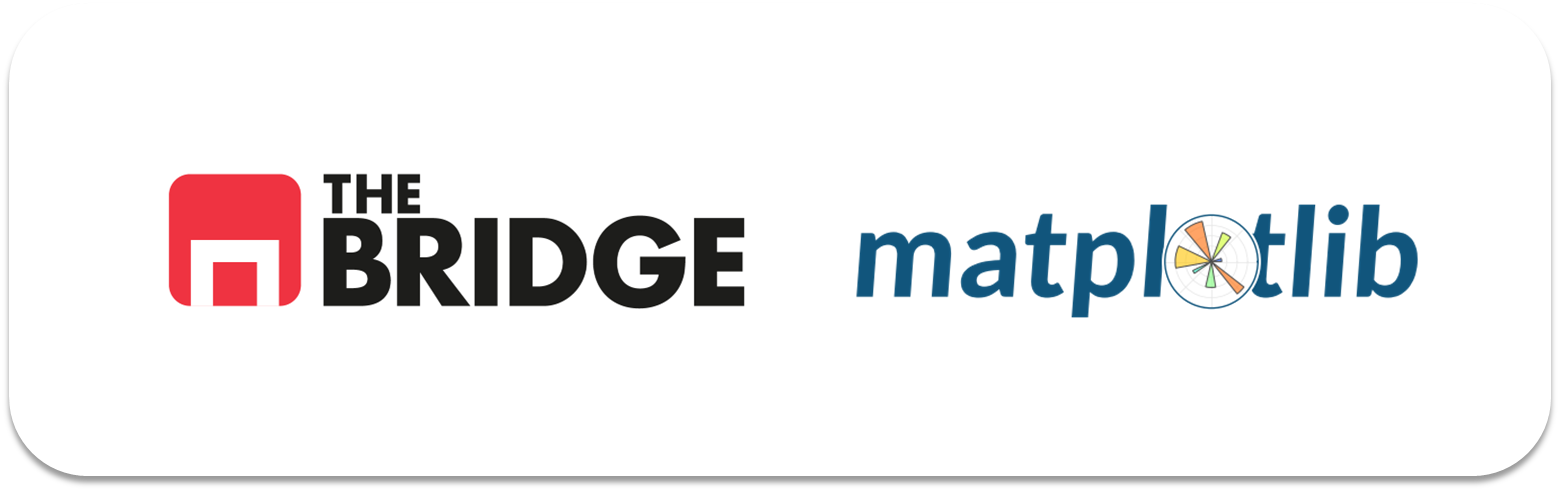

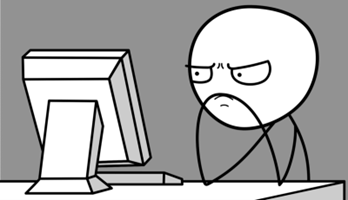

Para ejercitarte y afianzar lo aprendido sobre gráficas de Matplotlib, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # importamos nuestras herramientas


### Ejercicio 1


Carga tu qerido dataset del titanic, en la ruta "./data/titanic.csv", no hace falta que hagas limpieza.

In [3]:
df_titanic = pd.read_csv("./data/titanic.csv") # cargamos
df_titanic.head(3) # comprobamos la correcta carga de los datos

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


### Ejercicio 2



Crea el histograma de la variable `age` de forma que se reproduzca la siguiente figura (tiene 30 bines)

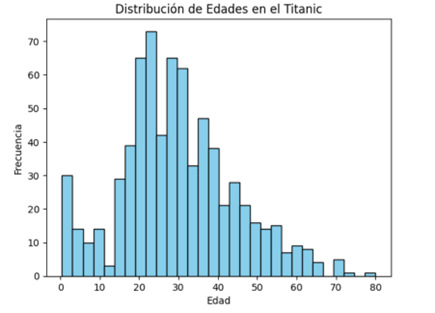

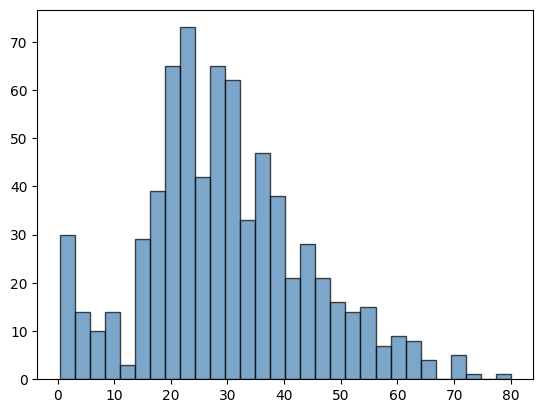

In [ ]:
plt.hist(df_titanic["age"], # datos que va a tener en cuenta para hacer el histograma. Tener en cuenta que tenemos que tenemos que señalar específicamente la columna, en este caso "age"
         bins = 30, # cantidad de barras
         alpha = 0.7, # intensidad de color
         color = "steelblue", # color
         edgecolor = "black" # agregar el bordeado negro de las barras para mejor visibilidad.
        );

### Ejercicio 3

¿Cuáles son los 3 intervalos de valores con mayor número de viajeros según el gráfico anterior? ¿Obtén también el número de viajeros en cada uno?

In [11]:

df_titanic["age_interval"] = pd.cut(df_titanic["age"], bins=30) # Dividimos la columna 'age' en 30 intervalos (como en el histograma)

conteo_intervalos = df_titanic["age_interval"].value_counts().sort_values(ascending=False) # Hacemos un conteo para saber cuantos pasajeros hay por intervalo. Ordenamos el resultado.

top_3 = conteo_intervalos.head(3) # Al haber ordenado el resultado anterior, sólo nos queda extraer los 3 primeros resultados de "conteo_intervalos"
print(top_3)


age_interval
(21.641, 24.294]    73
(18.989, 21.641]    65
(26.947, 29.599]    65
Name: count, dtype: int64


### Ejercicio 4

Obten el diagrama de caja del precio del billete usando las funciones de matplotlib y reproduciendo la siguiente figura (tendrás que bucear un poco en los parámetros, y usar patch_artist = True, el tamaño de los bigotes está ajustado a 3 IQRs):

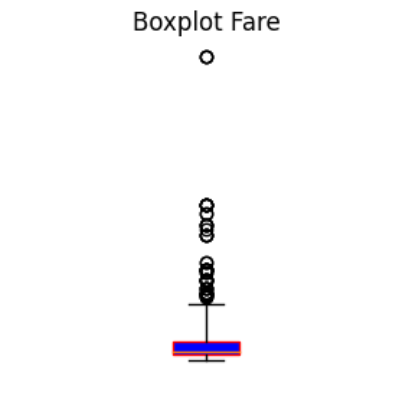

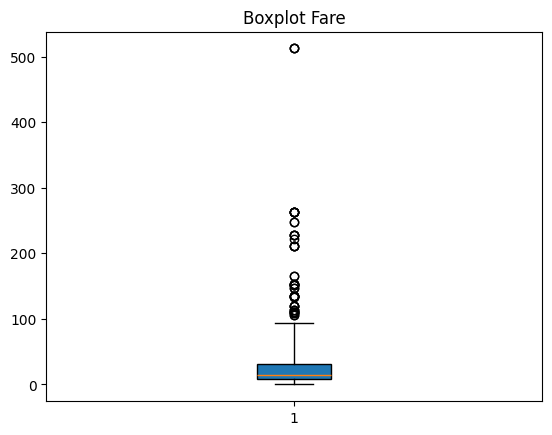

In [18]:
plt.boxplot(df_titanic["fare"], whis = 3,patch_artist=True)
plt.title("Boxplot Fare");

### Ejercicio 5

Crea el gráfico de frecuencias absolutas y relativas de las ciudades de embarque del Titanic de forma que repodruzcan la siguiente figura:

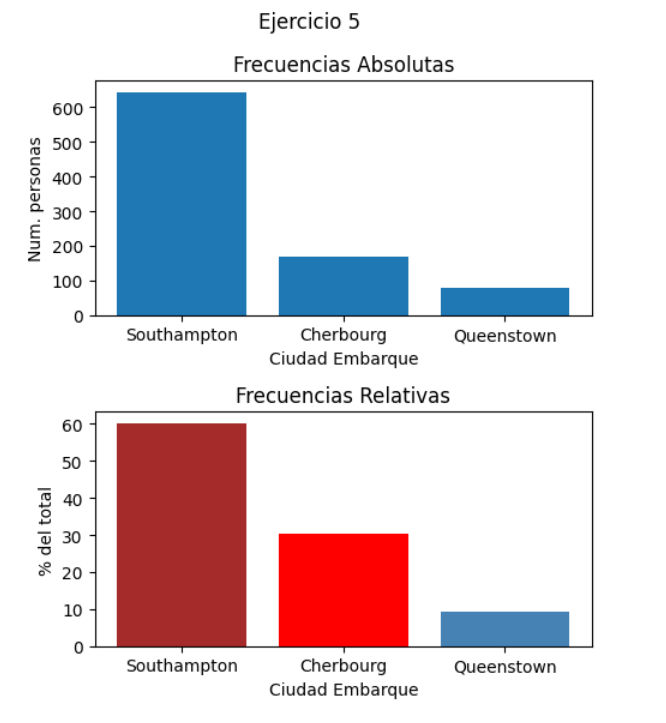

In [38]:
# EXTRACCIÓN DE CATEGORICAS QUE IRÁN EN NUESTRO GRÁFICO
categoricas = df_titanic.embark_town.value_counts().index.to_list() # Lo primero establecemos las categóricas de nuestras gráficas. En este caso extraemos las ciudades de nuestra columna de "embark_town". Utilizamos Value_count para obtener tanto las diferentes ciudades como su frecuencia absoluta. El index lo utilizamos para sólo extraer los nombres de las ciudades (el indice de lo que nos daría usando solo value_counts), y por último usamos "to list" para que nos devuelva una lista y así poder ponerlo sin priblemas en nuestra representación gráfica.


# OBTENEMOS LAS FRECUENCIAS ABSOLUTAS CON LAS QUE VAMOS A TRABAJAR
frecuencias_absolutas = df_titanic.embark_town.value_counts().to_list() # Obtenemos sólo en número de personas por ciudad. Al darnos un resultado ordenado , lo podemos cruzar con las ciudades de la variable "categoricas" ya que están también ordenados por frecuencia.


# OBTENEMOS LAS FRECUENCIAS RELATIVAS 
frecuencias_relativas = (df_titanic.embark_town.value_counts(normalize=True)*100).to_list() # Obtenemos la frecuencia relativa ordenada de mayor a menor . Añadir que nos devuele el resultado en un alista por usar ".to_list"

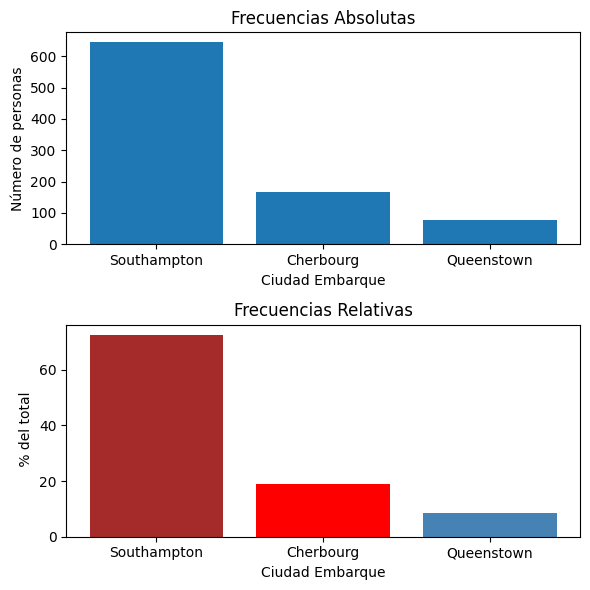

In [45]:
# PROCEDEMOS REPRESENTAR LOS DATOS MEDIANTE MATPLOTLIB
fig, ax = plt.subplots(2,1,figsize = (6,6))  # creamos un lienzo donde pintar los dos subplots. 2 se refiere a la cantidad de subplots verticales que caben. "1" se refiere a la cantidad de subplots que podemos crear en horizontal.Figsize al tamaño en pulgadas en la figura.

ax[0].bar(categoricas,frecuencias_absolutas) # mediante el método ".bar" creamos un diagrama de barras. "categoricas" en el eje "x" y "frecuencias_absolutas" en el eje "y"
ax[0].set_title("Frecuencias Absolutas")
ax[0].set_xlabel("Ciudad Embarque")
ax[0].set_ylabel("Número de personas")

ax[1].bar(categoricas,frecuencias_relativas, color = ["brown","red","steelblue"])
ax[1].set_title("Frecuencias Relativas")
ax[1].set_xlabel("Ciudad Embarque")
ax[1].set_ylabel(" % del total")

plt.tight_layout() # ajustamos de manera automática los gráficos para que sus títulos no se sobrepongan.

### Ejercicio 6

Crea el gráfico de dispersión entre el precio y la edad, de forma que reproduzca el siguiente gráfico (tendrás que emplear el argumento alpa)

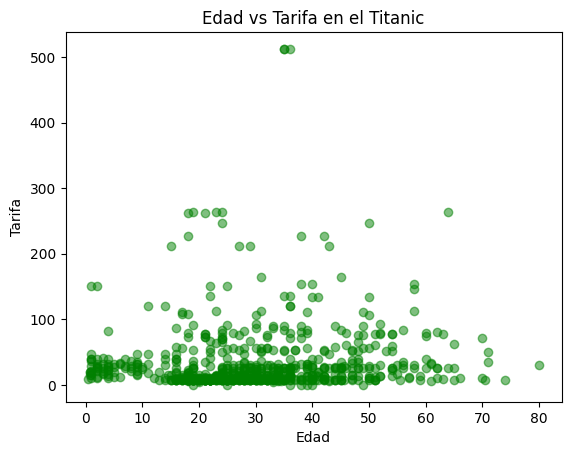

In [61]:
plt.scatter(df_titanic["age"],df_titanic["fare"], alpha = 0.5, color= "green") # eje "x" introducimos la variable edad. Eje "y" introducimos variable "fare". "alpha" lo usamos para la transparencia del color.
plt.title("Edad vs Tarifa en el Titanic") # ponemos título
plt.xlabel("Edad") # titulo eje x
plt.ylabel("Tarifa"); # titulo eje y

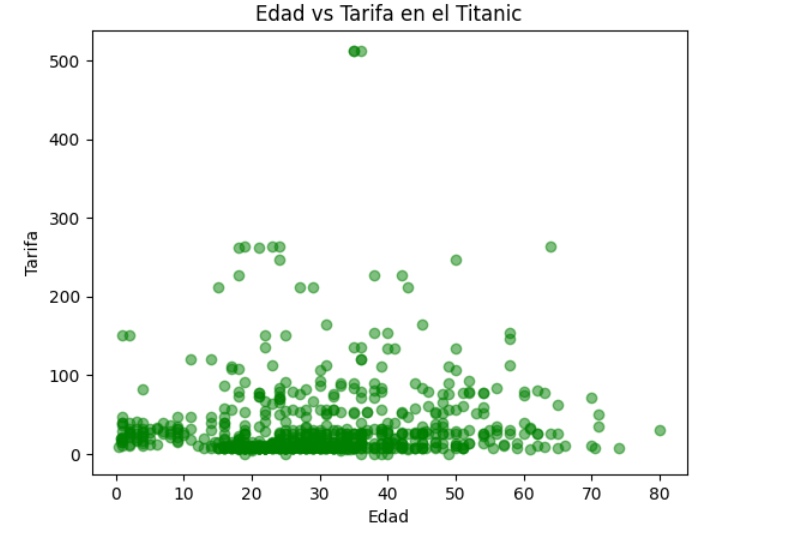

### Ejercicio 7

Vamos a obtener el precio medio por edad, de la siguiente forma agrupa por edad y calcula la media de la tarifa, luego haz lo mismo pero calculando la desviación de estándar. Guarda los resultados en dos variables distintas.

In [ ]:
df_titanic["age"] = df_titanic["age"].round() # El problema es que teníamos edades que no eran un número entero lo cual dificultaba calcular la media. Hemos pasado las edades como 1.45 años a 1 por ejemplo.
df_titanic["age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [75]:
mean_fare_by_age = df_titanic.groupby("age")["fare"].mean()  # agrupamos las medias de del billete por edad.

In [76]:
std_fare_by_age = df_titanic.groupby("age")["fare"].std()


### Ejercicio 8

Considerando las medias como un conjunto de medidas y las desviaciones como el error de las mismas construye un diagrama de errores que reproduzca la siguiente figura, usando (£) como moneda:

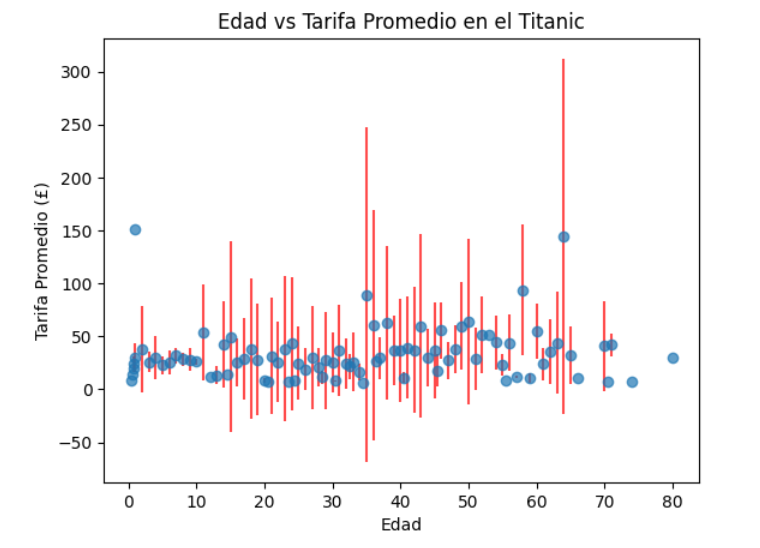

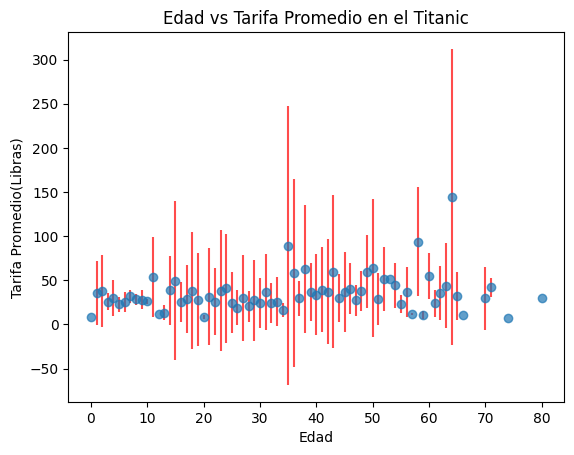

In [80]:

plt.errorbar(mean_fare_by_age.index,mean_fare_by_age,yerr=std_fare_by_age, fmt='o', ecolor='red', alpha=0.7 )
plt.title("Edad vs Tarifa Promedio en el Titanic")
plt.xlabel("Edad")
plt.ylabel("Tarifa Promedio(Libras)");

EXTRA: Pinta los cuatro primeros gráficos conjuntamente en una sóla figura como la que ves a continuación:

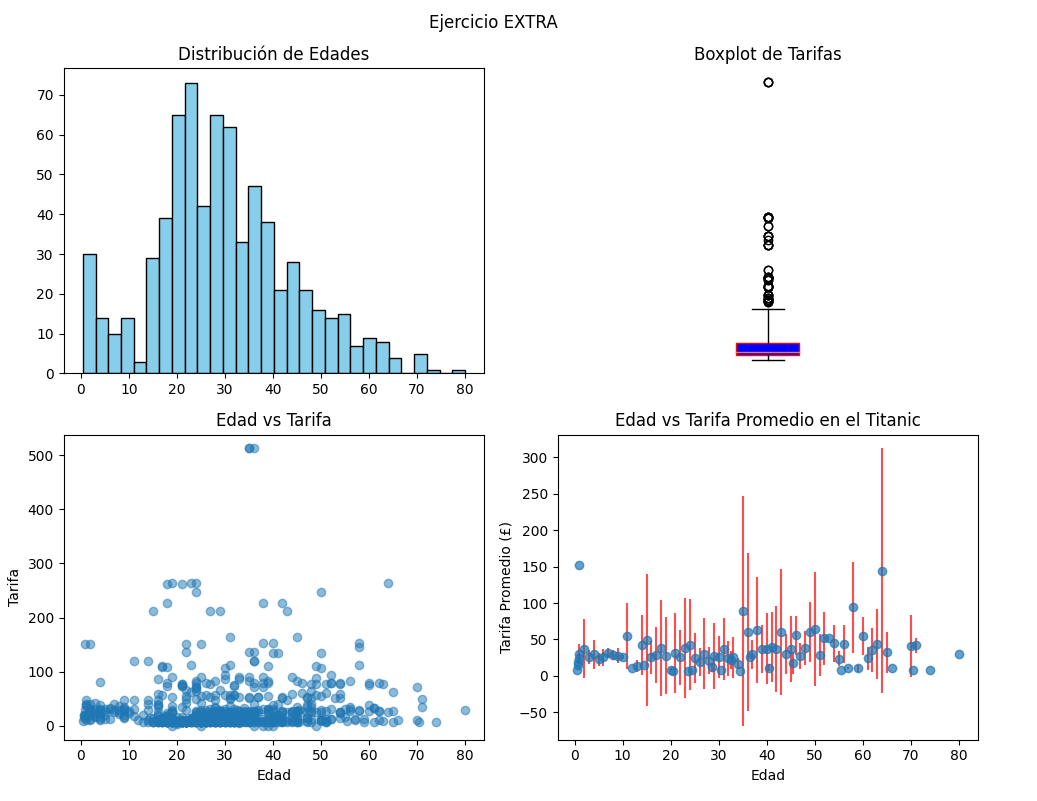

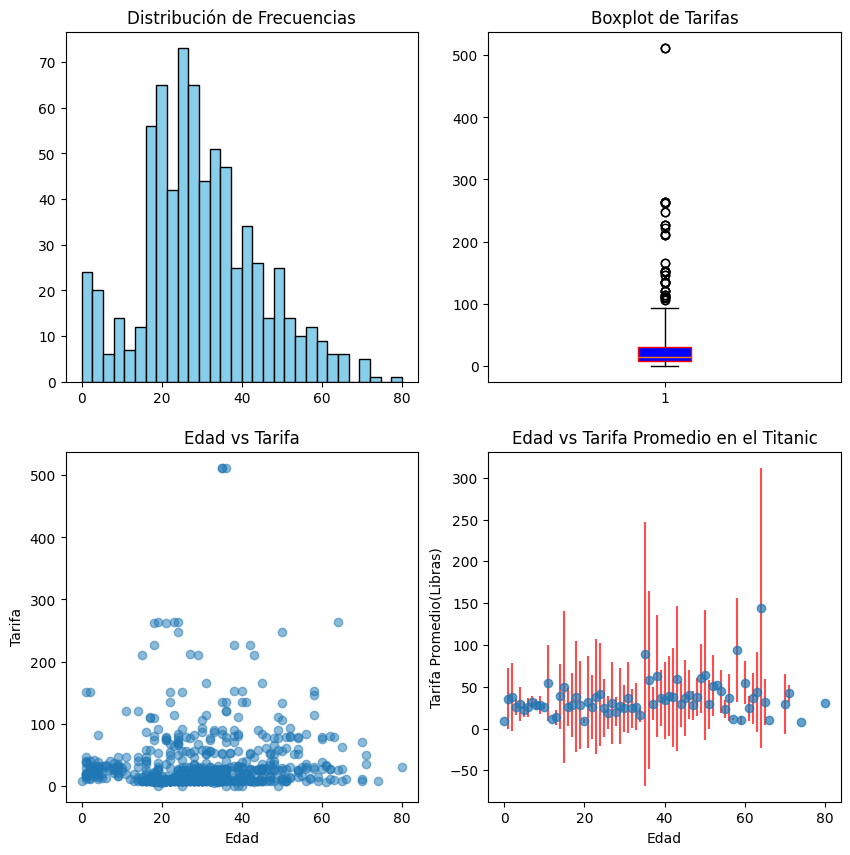

In [99]:
# Los gráficos están hechos en los ejercicios anteriores. Sin embargo , ahora se trata de ubicar los 4 gráficos en un liezo. Para ello deberemos de crear una figura de 2 x 2.

fig, ax = plt.subplots(2,2,figsize = (10,10))

# HISTOGRAMA

ax[0,0].hist(df_titanic["age"], bins = 30 , color='skyblue', edgecolor='black');
ax[0,0].set_title("Distribución de Frecuencias")

# DIAGRAMA DE CAJAS

ax[0,1].boxplot(df_titanic["fare"], boxprops= {"facecolor": "blue", "color": "red"}, 
            patch_artist= True, whis = 3)
ax[0,1].set_title("Boxplot de Tarifas")

# DISPERSIÓN
ax[1,0].scatter(df_titanic["age"],df_titanic["fare"], alpha = 0.5) 
ax[1,0].set_xlabel("Edad")
ax[1,0].set_ylabel("Tarifa")
ax[1,0].set_title("Edad vs Tarifa");

# GRÁFICO DE ERRORES
ax[1,1].errorbar(mean_fare_by_age.index,mean_fare_by_age,yerr=std_fare_by_age, fmt='o', ecolor='red', alpha=0.7 )
ax[1,1].set_title("Edad vs Tarifa Promedio en el Titanic")
ax[1,1].set_xlabel("Edad")
ax[1,1].set_ylabel("Tarifa Promedio(Libras)");

